Confusion Matrix:
[[ 767  308    0]
 [ 109 6538  101]
 [   0  296  900]]


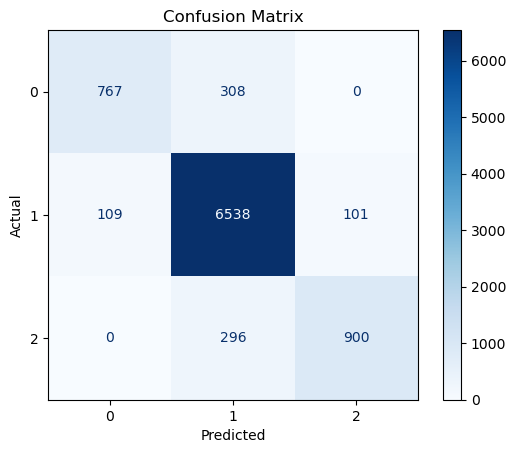

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1075
           1       0.92      0.97      0.94      6748
           2       0.90      0.75      0.82      1196

    accuracy                           0.91      9019
   macro avg       0.90      0.81      0.85      9019
weighted avg       0.91      0.91      0.91      9019



In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv(r'./features.csv', sep='\t', encoding='utf-8') #피쳐엔지니어링 한 csv 파일 불러오기

# 데이터 전처리
df = df.dropna().drop(columns=['Unnamed: 0']).reset_index(drop=True)
df['Biological Sex'] = df['Biological Sex'].map({'FEMALE': 0, 'MALE': 1}) #라벨링 해주기

# 레이블 생성 함수 정의 #정답값 미리 정의해두기 (향후 예측값과 비교를 통한 정확도 계산을 위함)
def classify_glucose(value, mean, std):
    if value > mean + std:
        return 'PersHigh'
    elif value < mean - std:
        return 'PersLow'
    else:
        return 'PersNorm'

# 평균 및 표준편차 계산
mean_glucose = df['glucose'].mean()
std_glucose = df['glucose'].std()

# 레이블 생성
df['label'] = df['glucose'].apply(lambda x: classify_glucose(x, mean_glucose, std_glucose))

# 레이블을 숫자로 매핑 (타겟값을 위한 매핑)
df['label'] = df['label'].map({'PersLow': 0, 'PersNorm': 1, 'PersHigh': 2})

# 불필요한 열 제거
df = df.drop(columns=['datetime', 'glucose'])

# 특성과 레이블 분리
X = df.drop(columns=['label'])
y = df['label']

# 훈련 데이터와 테스트 데이터 분리 (7:3으로 train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Extra Trees Classifier 모델 학습 (세션아이디랑 통일시키기)
model = ExtraTreesClassifier(random_state=123)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 혼동행렬 및 성능 평가
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# 혼동행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 분류 보고서 출력
print(classification_report(y_test, y_pred))
